# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Christian Jackson

#### GitHub Repo: https://github.com/ChristianJBNB/wmnlp-materials-article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [2]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip list
print('All prereqs installed.')

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [23]:
import requests
import pickle
from bs4 import BeautifulSoup

url = "https://theanalyst.com/na/2021/04/how-advanced-analytics-have-changed-basketball/"
response = requests.get(url)
filename = "atricle_content.pkl"
soup = BeautifulSoup(response.text, "html.parser")
html_content = str(soup.find("article"))

with open(filename, "wb") as file:
    pickle.dump(html_content, file)

In [59]:
url = "https://theanalyst.com/na/2021/04/how-advanced-analytics-have-changed-basketball/"
response = requests.get(url)

with open('article_content.html', 'w', encoding='utf-8') as file:
    file.write(response.text)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [58]:
import pickle
from textblob import TextBlob

pkl_file_path = 'atricle_content.pkl'  
with open(pkl_file_path, 'rb') as file:
    text_data = pickle.load(file)
    if isinstance(text_data, list):
        text_data = " ".join(text_data)  

blob = TextBlob(text_data)
polarity = blob.sentiment.polarity

print("Polarity Score of Text:", polarity)
print("Number of sentences in text:", len(blob.sentences))


Polarity Score of Text: 0.043038753941531706
Number of sentences in text: 84


In [24]:
filename = 'atricle_content.pkl'

with open(filename, 'rb') as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, "html.parser")
print(soup.get_text())





NBA


How the ‘Idiots Who Believe’ in the Analytics Movement Have Forever Changed Basketball


Apr 15, 2021
Taylor Bechtold / Author, Matt Sisneros / Design








As Moneyball’s influence began to spread, basketball teams began to explore what advanced data could do for them. The game will never be the same.

In the aftermath of baseball’s analytics movement and the attention that followed, data’s influence seemed to spread to the basketball world overnight.
That’s partly because there were those who were anxious to find out if the way general manager Billy Beane and the cash-strapped Oakland A’s succeeded by embracing an analytics-heavy scouting and player-evaluation model could translate to other sports.
The A’s game-changing strategy was the subject of Michael Lewis’ 2003 award-winning book ‘Moneyball: The Art of Winning an Unfair Game’ and featured in the ’11 film adaptation that was nominated for six Academy Awards, including Brad Pitt for playing the role of Beane.
The less

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [26]:
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(soup.get_text())
tokens = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in STOP_WORDS]

most_common_tokens = Counter(tokens).most_common(5)

print('The 5 most common tokens are:')
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")
print('')

all_tokens = Counter(tokens)
print("All tokens with frequencies:")
for token, frequency in all_tokens.items():
    print(f"{token}: {frequency}")

The 5 most common tokens are:
game: 34
basketball: 25
data: 25
players: 24
analytics: 22

All tokens with frequencies:
nba: 15
idiots: 2
believe: 1
analytics: 22
movement: 6
forever: 1
changed: 2
basketball: 25
apr: 1
taylor: 1
bechtold: 1
author: 2
matt: 1
sisneros: 1
design: 2
moneyball: 6
influence: 3
began: 5
spread: 4
teams: 18
explore: 1
advanced: 5
data: 25
game: 34
aftermath: 2
baseball: 6
attention: 1
followed: 1
world: 2
overnight: 2
partly: 2
anxious: 1
find: 1
way: 6
general: 3
manager: 3
billy: 1
beane: 2
cash: 1
strapped: 1
oakland: 1
succeeded: 1
embracing: 1
heavy: 1
scouting: 1
player: 20
evaluation: 6
model: 2
translate: 2
sports: 8
changing: 1
strategy: 3
subject: 3
michael: 3
lewis: 2
award: 1
winning: 2
book: 3
art: 1
unfair: 1
featured: 1
film: 1
adaptation: 1
nominated: 1
academy: 1
awards: 1
including: 4
brad: 1
pitt: 1
playing: 5
role: 1
lesson: 1
simple: 1
deeper: 2
value: 4
metrics: 7
soon: 2
realized: 1
mindset: 2
court: 6
success: 1
likewise: 1
mined: 1
tec

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [27]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(soup.get_text())
lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]

most_common_lemmas = Counter(lemmas).most_common(5)

print("Most common lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")
print('')

all_lemmas = Counter(lemmas)
print("All lemmas with frequencies:")
for lemma, frequency in all_lemmas.items():
    print(f"{lemma}: {frequency}")

Most common lemmas:
player: 44
game: 38
team: 28
basketball: 25
datum: 22

All lemmas with frequencies:
nba: 15
idiots: 1
believe: 4
analytics: 2
movement: 7
forever: 1
change: 3
basketball: 25
apr: 1
taylor: 1
bechtold: 1
author: 2
matt: 1
sisneros: 1
design: 2
moneyball: 6
influence: 3
begin: 5
spread: 4
team: 28
explore: 2
advanced: 4
datum: 22
game: 38
aftermath: 2
baseball: 6
analytic: 20
attention: 1
follow: 3
world: 2
overnight: 2
partly: 2
anxious: 1
find: 1
way: 8
general: 3
manager: 3
billy: 1
beane: 2
cash: 1
strap: 1
oakland: 1
succeed: 1
embrace: 2
heavy: 1
scouting: 1
player: 44
evaluation: 7
model: 3
translate: 2
sport: 4
strategy: 4
subject: 3
michael: 3
lewis: 2
award: 1
win: 6
book: 3
art: 1
unfair: 1
feature: 1
film: 1
adaptation: 1
nominate: 1
academy: 1
awards: 1
include: 4
brad: 1
pitt: 1
play: 11
role: 1
lesson: 1
simple: 2
deep: 2
value: 4
metric: 9
soon: 2
realize: 1
mindset: 2
court: 6
success: 1
likewise: 1
technology: 11
capable: 1
spark: 1
revolution: 3
ear

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

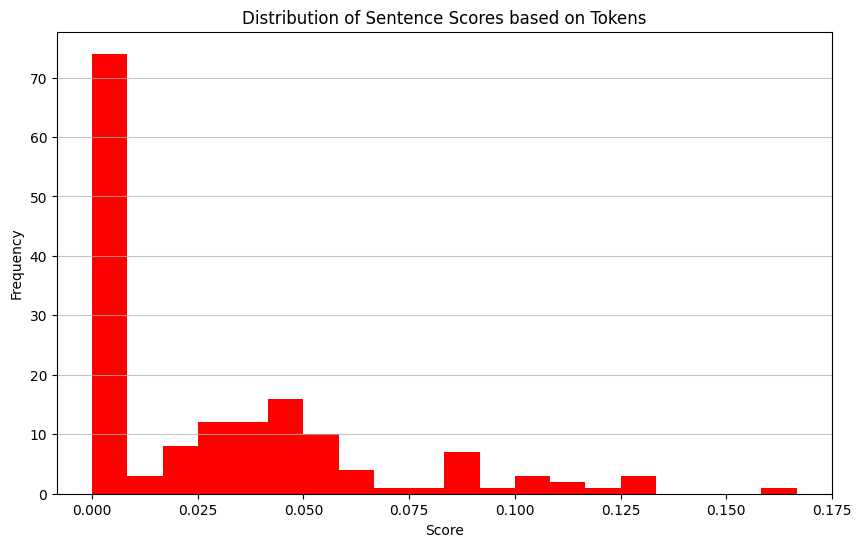

In [30]:
import matplotlib.pyplot as plt

def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    interesting_count = sum(token.text.lower() in interesting_tokens for token in doc)
    score = interesting_count / len(doc) if doc else 0
    return score

sentences = soup.get_text().split('.')
token_scores = [score_sentence_by_token(sentence, [token.lower() for token, _ in most_common_tokens]) for sentence in sentences if sentence.strip()]

plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, color='red')
plt.title('Distribution of Sentence Scores based on Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

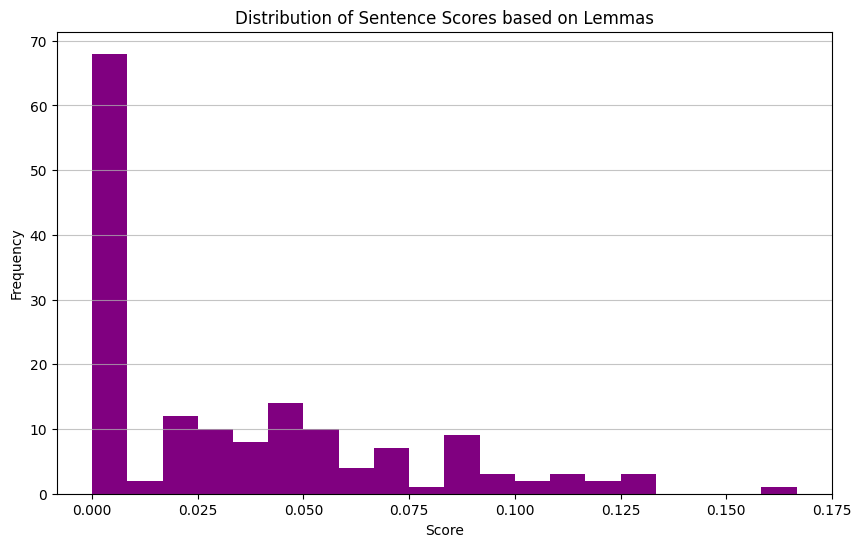

In [31]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    interesting_count = sum(token.lemma_.lower() in interesting_lemmas for token in doc)
    score = interesting_count / len(doc) if doc else 0
    return score

lemma_scores = [score_sentence_by_lemma(sentence, [lemma.lower() for lemma, _ in most_common_lemmas]) for sentence in sentences if sentence.strip()]

plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='purple')
plt.title('Distribution of Sentence Scores based on Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.2
* Cutoff Score (lemmas): 0.2

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [71]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')

file_path = 'article_content.html' 
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]


your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary = ' '.join(summary_sentences)

print("Summary:")
print(summary)

Summary:
Too Many Requests",sm:"Too-Many"},TOO_BIG:{message:"Payload was too large",sm:"Too-Big"},CROSS_TAB:{message:"Session Entity was set to OFF on another tab",sm:"Cross-Tab"},ENTITLEMENTS:{message:"Session Replay is not allowed and will not be started",sm:"Entitlement"}},f=5e3},3112:(e,t,r)=>{"use strict";r.d(t,{HM:()=>c,ev:()=>o,rU:()=>s,wi:()=>u});var n=r(234),i=r(385);const o=e=>i.il&&!0===(0,n. Z)("".concat(r.featureName," is enabled but one or more dependent features has not been initialized (").concat((0,_.P)(n),"). Taylor manages all U.S. content for Opta Analyst, but he’s still more into creating content than content calendars. function(i,n){var o,s,e;function c(e){try{var t={supportTests:e,timestamp:(new Date).valueOf()};sessionStorage.setItem(o,JSON.stringify(t))}catch(e){}}function p(e,t,n){e.clearRect(0,0,e.canvas.width,e.canvas.height),e.fillText(t,0,0);var t=new Uint32Array(e.getImageData(0,0,e.canvas.width,e.canvas.height).data),r=(e.clearRect(0,0,e.canvas.width,e.c

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [72]:
from textblob import TextBlob
import nltk

blob = TextBlob(summary)
polarity = blob.sentiment.polarity


print("Polarity Score:", polarity)
print("Number of Sentences in Summary:", len(blob.sentences))

Polarity Score: 0.38732156194744227
Number of Sentences in Summary: 30


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [75]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')

file_path = 'article_content.html' 
with open(file_path, 'r', encoding='utf-8') as file:
    article_text = file.read()

doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

your_cutoff_score = 0.3
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary = ' '.join(summary_sentences)

print("Summary:")
print(summary)

Summary:
Too Many Requests",sm:"Too-Many"},TOO_BIG:{message:"Payload was too large",sm:"Too-Big"},CROSS_TAB:{message:"Session Entity was set to OFF on another tab",sm:"Cross-Tab"},ENTITLEMENTS:{message:"Session Replay is not allowed and will not be started",sm:"Entitlement"}},f=5e3},3112:(e,t,r)=>{"use strict";r.d(t,{HM:()=>c,ev:()=>o,rU:()=>s,wi:()=>u});var n=r(234),i=r(385);const o=e=>i.il&&!0===(0,n. Z)("".concat(r.featureName," is enabled but one or more dependent features has not been initialized (").concat((0,_.P)(n),"). Taylor manages all U.S. content for Opta Analyst, but he’s still more into creating content than content calendars. function(i,n){var o,s,e;function c(e){try{var t={supportTests:e,timestamp:(new Date).valueOf()};sessionStorage.setItem(o,JSON.stringify(t))}catch(e){}}function p(e,t,n){e.clearRect(0,0,e.canvas.width,e.canvas.height),e.fillText(t,0,0);var t=new Uint32Array(e.getImageData(0,0,e.canvas.width,e.canvas.height).data),r=(e.clearRect(0,0,e.canvas.width,e.c

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [76]:
from textblob import TextBlob

blob = TextBlob(summary)

polarity = blob.sentiment.polarity

print("Polarity Score of Summary:", polarity)
print("Number of Sentences in Summary:", len(blob.sentences))

Polarity Score of Summary: 0.5043644266917294
Number of Sentences in Summary: 21


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity score for my summary using tokens was 0.39, where the polairty score for my summary using lemmas was 0.5. The polarity socre of the original article was 0.04. There is a very big difference between the summaries and the original article. I feel this happened because when making the summary, we were only looking for the most important sentences and because of that, the summaries had a very direct approach, which would drastically change the polarity of the article.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I think that the summary that was done using tokens was better than the summary that used lemmas. I think this because it has more of the sentences that I deemed to be the most important when I first read the article.